Calibration of Heston model to FX option market data 
==

This notebook will reproduce the calibration results from section 1.4 in ['FX Smile in the Heston Model'](https://arxiv.org/abs/1010.1617)

Citation:
Janek, Agnieszka & Kluge, Tino & Weron, Rafał & Wystup, Uwe. (2010). FX Smile in the Heston Model. Statistical Tools for Finance and Insurance. 10.48550/arXiv.1010.1617. 

In [2]:
# Imports
import os
if __name__ == "__main__":
    os.chdir(os.environ.get('PROJECT_DIR_FRM')) 

from frm.pricing_engine.heston_garman_kohlhagen import heston_fit_vanilla_fx_smile
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from time import time
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

The following data is copied from the MATLAB file 'STF2hes07.m' and its outputs. 

There have been minor changes to variable names and quoting convetions.

The file was retrieved from [https://ideas.repec.org/c/wuu/hscode/zip10001.html](https://ideas.repec.org/c/wuu/hscode/zip10001.html). The webpage has also been saved to [WaybackMachine](https://web.archive.org/web/20240926111306/https://ideas.repec.org/c/wuu/hscode/zip10001.html)


In [4]:
Δ = np.array([0.1, 0.25, 0.5, -0.25, -0.1])
r_d = np.array([0.31100, 0.32875, 0.49781, 0.70075, 1.08, 1.08]) * 0.01
r_f = np.array([0.58, 0.631, 0.884, 1.131, 1.399, 1.399]) * 0.01
tau = np.array([7 / 365, 1 / 12, 3 / 12, 6 / 12, 1, 2])
S0 = 1.2779

cp = np.array([1, 1, 1, -1, -1])
Δ_convention = 'regular_forward_Δ'

tenors = ['1W','1M','3M','6M','1Y','2Y']

σ_market_set = [
    np.array([13.948, 13.192, 13.35, 14.042, 15.4355]) * 0.01,      # 1W 
    np.array([12.45, 12.249, 12.7, 13.749, 15.225]) * 0.01,         # 1M
    np.array([12.6885, 12.3945, 13.0495, 14.5445, 16.666]) * 0.01,  # 3M
    np.array([13.688, 12.899, 13.55, 15.299, 18.1275]) * 0.01,      # 6M
    np.array([13.6705, 12.668, 13.187, 14.718, 17.2705]) * 0.01,    # 1Y
    np.array([12.139, 11.784, 12.174, 13.284, 14.764]) * 0.01       # 2Y
]

# Results of STF2hes07.m
# [IV (10, 25, ATM, 75, 90), SSE] * 100%
MATLAB_IV_SSE = [
    np.array([13.9211, 13.2659, 13.2548, 14.1217, 15.4063, 0.0002]), # 1W 
    np.array([12.4581, 12.2439, 12.6723, 13.8030, 15.1972, 0.0000]), # 1M
    np.array([12.6938, 12.4002, 13.0049, 14.6137, 16.6331, 0.0001]), # 3M
    np.array([13.6671, 12.9641, 13.4527, 15.3880, 18.0948, 0.0002]), # 6M
    np.array([13.6178, 12.7871, 13.0836, 14.7562, 17.2699, 0.0003]), # 1Y
    np.array([12.1160, 11.8254, 12.1683, 13.2481, 14.7866, 0.0000])  # 2Y
]

# Results of STF2hes07.m 
# v0, vv, kappa, theta, rho, 2*kappa*theta - vv^2
MATLAB_heston_params = [
    np.array([0.0178, 1.2971, 1.5000, 0.1650, -0.1577, -1.1874]),  # 1W 
    np.array([0.0161, 0.5836, 1.5000, 0.0487, -0.3143, -0.19460]), # 1M
    np.array([0.0170, 0.4804, 1.5000, 0.0362, -0.3763, -0.1224]),  # 3M
    np.array([0.0184, 0.5251, 1.5000, 0.0354, -0.3572, -0.1695]),  # 6M
    np.array([0.0174, 0.4724, 1.5000, 0.0277, -0.3114, -0.1400]),  # 1Y
    np.array([0.0148, 0.3159, 1.5000, 0.0190, -0.3004, -0.0430])   # 2Y
]

Following series are plotted:
1. market volatilies
2. implied volatilies from the 'frm' Heston calibration  
3. implied volatilies from the MATLAB Heston calibration 

The implied volatilities (#2 & #3) lie on top of each other, evidencing reproduction of the calibration. 

The 'heston_cosine' pricing method was applied (as it is the fastest). The other pricing methods achieve the same result. 

=== 1W calibration results ===
v0, vv, kappa, theta, rho: (0.017822, 1.298958, 1.5, 0.165264, -0.157114)
[IV (10, 25, ATM, 75, 90), SSE] * 100%: ([13.921342, 13.266554, 13.25375, 14.12099, 15.40699], 0.000226)


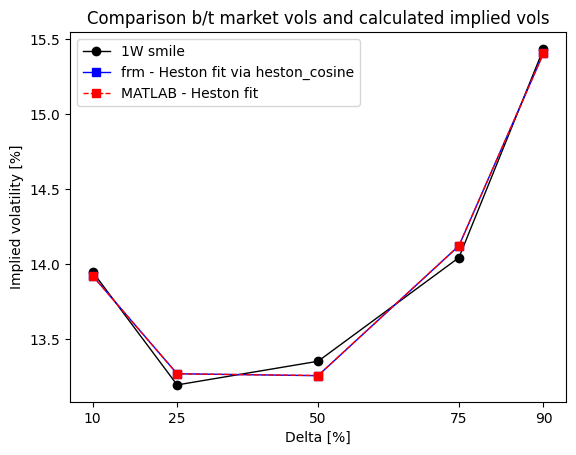

=== 1M calibration results ===
v0, vv, kappa, theta, rho: (0.016129, 0.583622, 1.5, 0.048669, -0.314286)
[IV (10, 25, ATM, 75, 90), SSE] * 100%: ([12.458131, 12.243924, 12.672314, 13.802953, 15.197183], 4.5e-05)


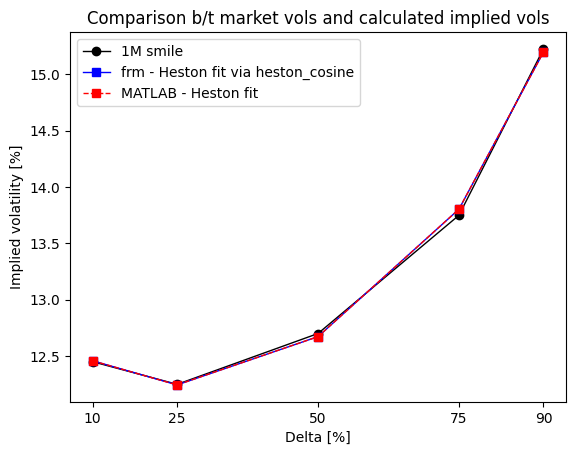

=== 3M calibration results ===
v0, vv, kappa, theta, rho: (0.017029, 0.482084, 1.5, 0.036194, -0.375885)
[IV (10, 25, ATM, 75, 90), SSE] * 100%: ([12.696871, 12.398271, 13.001044, 14.613901, 16.639043], 8e-05)


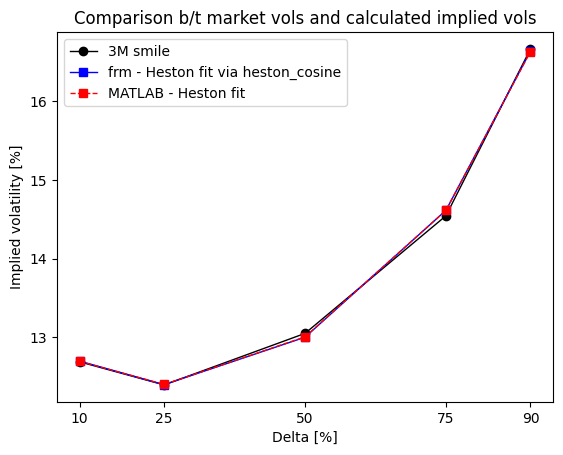

=== 6M calibration results ===
v0, vv, kappa, theta, rho: (0.01836, 0.525228, 1.5, 0.035407, -0.357046)
[IV (10, 25, ATM, 75, 90), SSE] * 100%: ([13.666865, 12.964463, 13.452532, 15.387764, 18.094898], 0.000232)


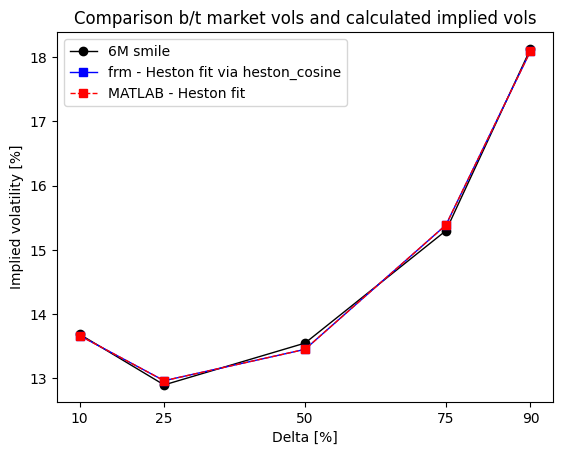

=== 1Y calibration results ===
v0, vv, kappa, theta, rho: (0.01739, 0.472547, 1.5, 0.027723, -0.311243)
[IV (10, 25, ATM, 75, 90), SSE] * 100%: ([13.617606, 12.787492, 13.083524, 14.756006, 17.269916], 0.000292)


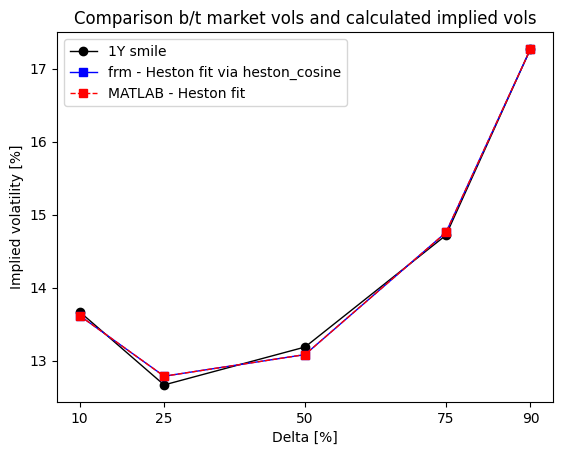

=== 2Y calibration results ===
v0, vv, kappa, theta, rho: (0.014821, 0.315987, 1.5, 0.018954, -0.300401)
[IV (10, 25, ATM, 75, 90), SSE] * 100%: ([12.116023, 11.825374, 12.168164, 13.248055, 14.786691], 4.1e-05)


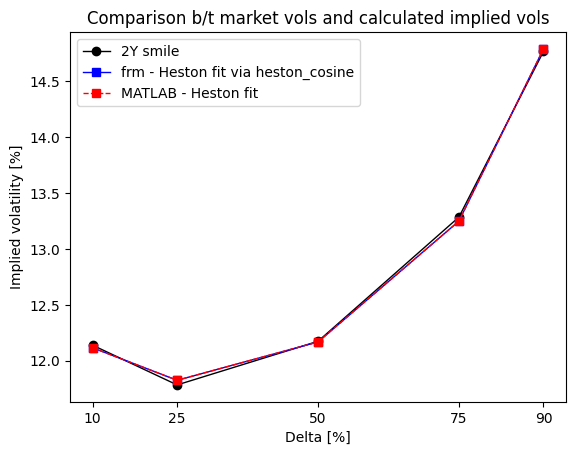

In [5]:
# pricing_method = 'heston_analytical_1993'
# pricing_method = 'heston_carr_madan_gauss_kronrod_quadrature'
# pricing_method = 'heston_carr_madan_fft_w_simpsons'
pricing_method = 'heston_cosine'

Δ_for_plt = np.array([0.1, 0.25, 0.5, 0.75, 0.9]) # forward deltas

# Main loop for various smiles
for i, σ_market in enumerate(σ_market_set):
    
    var0, vv, kappa, theta, rho, lambda_, IV, SSE = heston_fit_vanilla_fx_smile(Δ, Δ_convention, σ_market, S0, r_f[i], r_d[i], tau[i], cp, pricing_method=pricing_method)        
    params = np.array([var0, vv, kappa, theta, rho])
    var0 = round(var0.item(), 6)
    vv = round(vv.item(), 6)
    theta = round(theta.item(), 6)
    rho = round(rho.item(), 6)
    
    IV *= 100
    IV_list = [round(v.item(), 6) for v in list(IV)]
    SSE = round(100 * SSE.item(), 6) 
    
    IV_MATLAB = MATLAB_IV_SSE[i][:-1]
    
    # Check frm fit matches the MATLAB fit
    assert (np.abs(IV - IV_MATLAB) < 0.01).all() # 0.01 = 0.01%
    assert (np.abs(params - MATLAB_heston_params[i][:-1]) / params  < 0.01).all() # Params are within 1%
        
    # Displaying output
    print(f'=== {tenors[i]} calibration results ===')
    print(f'v0, vv, kappa, theta, rho: {var0, vv, kappa, theta, rho}')
    print(f'[IV (10, 25, ATM, 75, 90), SSE] * 100%: {IV_list, SSE}')
    
    # Plot 
    plt.figure(i+1)
    plt.plot(Δ_for_plt * 100, σ_market * 100, 'ko-', linewidth=1)
    plt.plot(Δ_for_plt * 100, IV, 'bs-', linewidth=1)
    plt.plot(Δ_for_plt * 100, MATLAB_IV_SSE[i][:-1], 'rs--', linewidth=1)
    plt.legend([f'{tenors[i]} smile', f'frm - Heston fit via {pricing_method}', 'MATLAB - Heston fit'], loc='upper left')
    plt.xlabel('Delta [%]')
    plt.ylabel('Implied volatility [%]')
    plt.xticks(Δ_for_plt * 100)
    plt.title('Comparison b/t market vols and calculated implied vols')
    plt.show()
